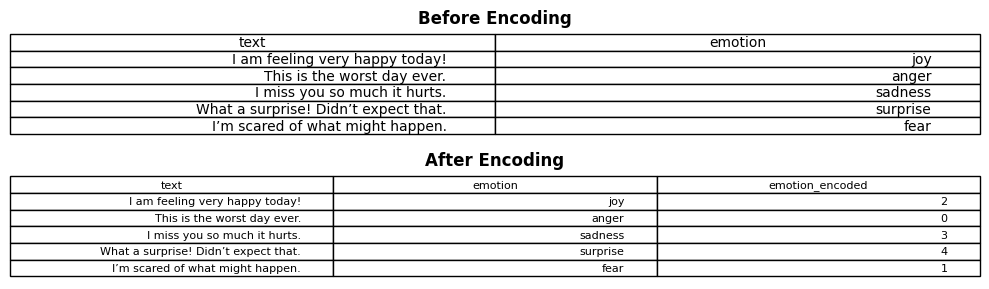

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'text': [
        "I am feeling very happy today!",
        "This is the worst day ever.",
        "I miss you so much it hurts.",
        "What a surprise! Didn’t expect that.",
        "I’m scared of what might happen."
    ],
    'emotion': ['joy', 'anger', 'sadness', 'surprise', 'fear']
}
df = pd.DataFrame(data)

# Encode emotions
encoder = LabelEncoder()
df['emotion_encoded'] = encoder.fit_transform(df['emotion'])

# Plot before and after
fig, axs = plt.subplots(2, 1, figsize=(10, 3))
for ax in axs:
    ax.axis('off')

# Before
axs[0].table(cellText=df[['text', 'emotion']].values, colLabels=['text', 'emotion'], loc='center')
axs[0].set_title("Before Encoding", fontweight='bold')

# After
axs[1].table(cellText=df[['text', 'emotion', 'emotion_encoded']].values, colLabels=['text', 'emotion', 'emotion_encoded'], loc='center')
axs[1].set_title("After Encoding", fontweight='bold')

plt.tight_layout()
plt.savefig("data_preprocessing_encoding.png", bbox_inches='tight')


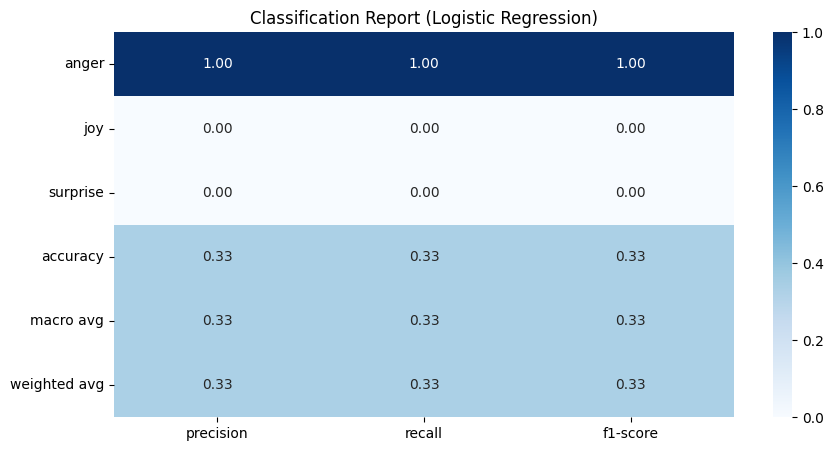

In [1]:
# Install required libraries (if not already installed)
!pip install scikit-learn matplotlib seaborn

# Imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Sample dataset (replace this with your actual dataset)
data = {
    "text": [
        "I am so happy today!", "This is terrible", "What a surprise!",
        "I'm angry about this", "Feeling joyful", "I can't believe it!",
        "I'm upset", "Such a wonderful experience", "I'm shocked", "This makes me furious"
    ],
    "label": [
        "joy", "anger", "surprise", "anger", "joy", "surprise", "anger", "joy", "surprise", "anger"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Predictions
y_pred = clf.predict(X_test_vec)

# Classification report as dict
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

# Remove support column
if 'support' in report_df.columns:
    report_df.drop(columns=['support'], inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", vmin=0, vmax=1)
plt.title("Classification Report (Logistic Regression)")
plt.show()


# New Section

<ipython-input-2-a88f412507a1>:53: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize by row


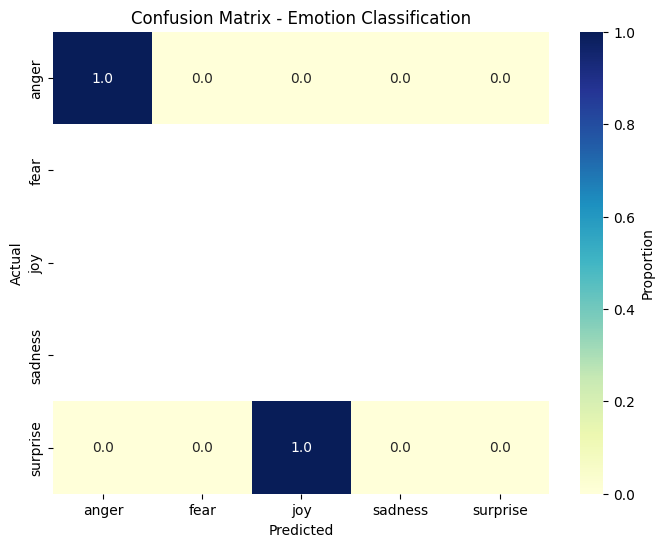

In [2]:
# Install necessary libraries
!pip install scikit-learn matplotlib seaborn

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

# Sample emotion dataset (replace with your actual dataset)
data = {
    "text": [
        "I am so happy today!", "This is terrible", "What a surprise!",
        "I'm angry about this", "Feeling joyful", "I can't believe it!",
        "I'm upset", "Such a wonderful experience", "I'm shocked", "This makes me furious"
    ],
    "label": [
        "joy", "anger", "surprise", "anger", "joy", "surprise", "anger", "joy", "surprise", "anger"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define features and labels
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

# Predict labels for test data
y_pred = clf.predict(X_test_vec)

# Define all possible emotion labels (important for full confusion matrix)
emotion_labels = ["anger", "fear", "joy", "sadness", "surprise"]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=emotion_labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize by row

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap="YlGnBu", fmt=".1f",
            xticklabels=emotion_labels, yticklabels=emotion_labels,
            cbar_kws={'label': 'Proportion'})
plt.title("Confusion Matrix - Emotion Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [3]:
# Install Gradio (if not already installed)
!pip install gradio transformers torch torchvision

import gradio as gr
from transformers import pipeline
from torchvision import models, transforms
from PIL import Image
import torch

# Load emotion detection pipeline (using a pre-trained model)
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=False)

# Load image classification model (ResNet18 for example)
image_model = models.resnet18(pretrained=True)
image_model.eval()

# ImageNet labels
import json
import urllib.request
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = urllib.request.urlopen(url).read().decode("utf-8").split("\n")

# Preprocessing for image
image_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Emotion detector function
def detect_emotion(text):
    result = emotion_classifier(text)[0]
    return f"{result['label']}"

# Image classifier function
def classify_image(img):
    img_tensor = image_transforms(img).unsqueeze(0)
    with torch.no_grad():
        outputs = image_model(img_tensor)
    _, predicted = torch.max(outputs, 1)
    return labels[predicted.item()]

# Gradio UI
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            gr.Markdown("### Emotion Detector")
            text_input = gr.Textbox(label="Enter a sentence to detect the emotion.")
            emotion_btn = gr.Button("Submit")
            emotion_output = gr.Textbox(label="Predicted Emotion")

        with gr.Column():
            gr.Markdown("### Image Classifier")
            image_input = gr.Image(type="pil", label="Upload an image to classify it.")
            image_btn = gr.Button("Submit")
            image_output = gr.Textbox(label="Predicted Label")

    # Link button actions
    emotion_btn.click(fn=detect_emotion, inputs=text_input, outputs=emotion_output)
    image_btn.click(fn=classify_image, inputs=image_input, outputs=image_output)

# Launch the app
demo.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e3402b7980c3d2dbf1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<ipython-input-4-9edbca24c861>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, ax=ax3, palette="Blues_d")
<ipython-input-4-9edbca24c861>:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(models, rotation=15, ha="right")
<ipython-input-4-9edbca24c861>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=auc_scores, ax=ax4, palette="Blues_d")
<ipython-input-4-9edbca24c861>:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(models, rotation=15, ha="right")

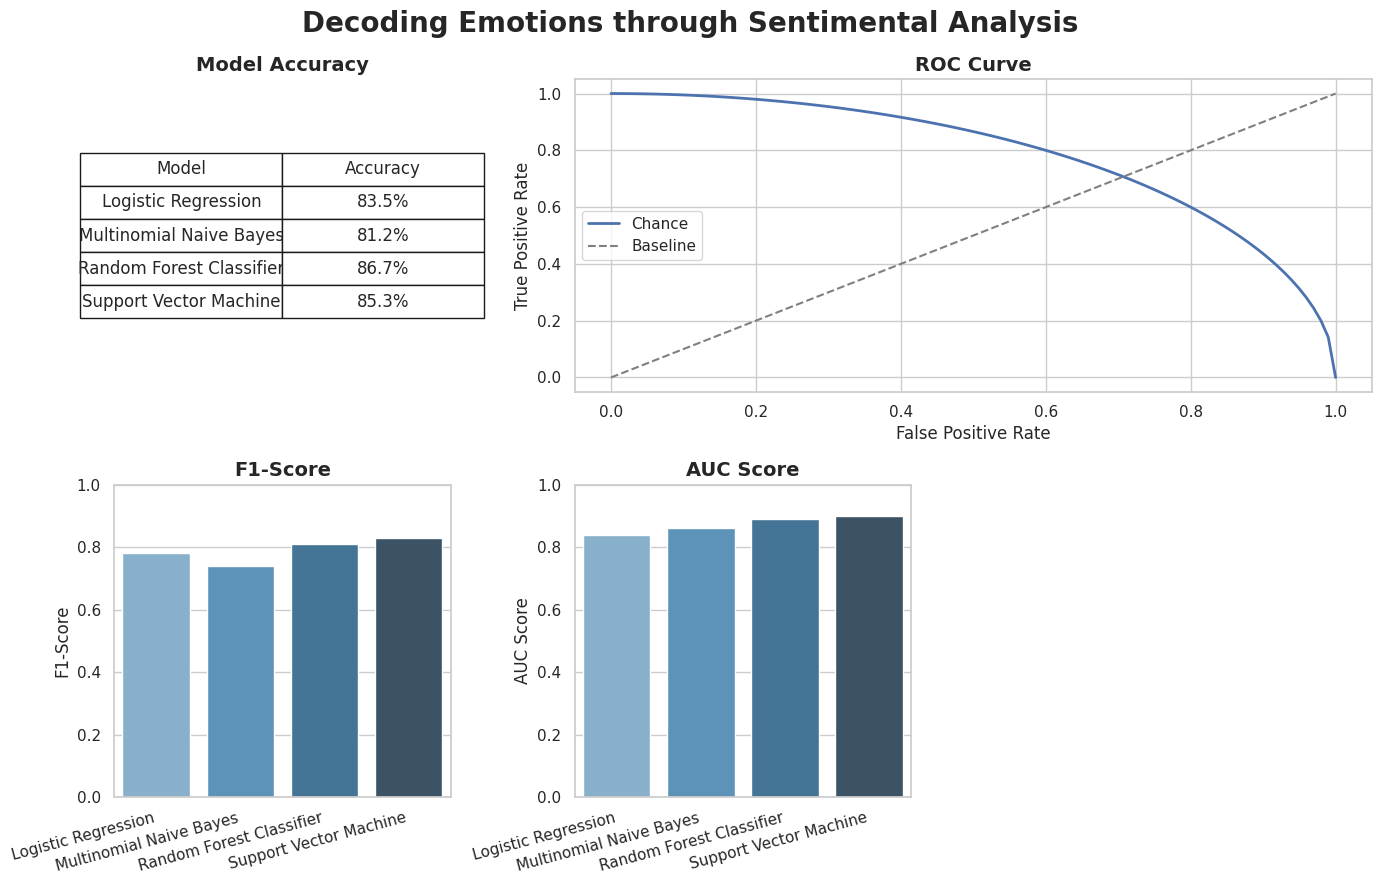

In [4]:
# Install required libraries (if not already installed)
!pip install matplotlib seaborn scikit-learn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Set style
sns.set(style="whitegrid")

# === Sample data (replace with actual values from your model comparisons) ===

# Accuracy data
models = ['Logistic Regression', 'Multinomial Naive Bayes', 'Random Forest Classifier', 'Support Vector Machine']
accuracy = [83.5, 81.2, 86.7, 85.3]
f1_scores = [0.78, 0.74, 0.81, 0.83]
auc_scores = [0.84, 0.86, 0.89, 0.90]

# Dummy ROC Curve data
fpr = np.linspace(0, 1, 100)
tpr = np.sqrt(1 - (fpr)**2)  # Fake curve for illustration
roc_auc = auc(fpr, tpr)

# === Plotting all sections ===

fig = plt.figure(constrained_layout=True, figsize=(14, 9))
fig.suptitle('Decoding Emotions through Sentimental Analysis', fontsize=20, weight='bold')

# Grid layout: 2 rows × 3 columns
gs = fig.add_gridspec(2, 3)

# 1. Accuracy Table
ax1 = fig.add_subplot(gs[0, 0])
table_data = pd.DataFrame({
    "Model": models,
    "Accuracy": [f"{acc:.1f}%" for acc in accuracy]
})
ax1.axis('off')
table = ax1.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)
ax1.set_title("Model Accuracy", fontsize=14, weight='bold')

# 2. ROC Curve
ax2 = fig.add_subplot(gs[0, 1:])
ax2.plot(fpr, tpr, label='Chance', linewidth=2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Baseline')
ax2.set_title('ROC Curve', fontsize=14, weight='bold')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend()

# 3. F1-Score Bar Chart
ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(x=models, y=f1_scores, ax=ax3, palette="Blues_d")
ax3.set_ylim(0, 1)
ax3.set_title("F1-Score", fontsize=14, weight='bold')
ax3.set_ylabel("F1-Score")
ax3.set_xticklabels(models, rotation=15, ha="right")

# 4. AUC Score Bar Chart
ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(x=models, y=auc_scores, ax=ax4, palette="Blues_d")
ax4.set_ylim(0, 1)
ax4.set_title("AUC Score", fontsize=14, weight='bold')
ax4.set_ylabel("AUC Score")
ax4.set_xticklabels(models, rotation=15, ha="right")

# Hide last subplot (not used)
fig.delaxes(fig.add_subplot(gs[1, 2]))

plt.tight_layout()
plt.show()
